# Image Recognition with Convolutional Networks (CNNS)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 67s 0us/step


d:\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 409s 439ms/step - accuracy: 0.4111 - loss: 1.7613 - val_accuracy: 0.5545 - val_loss: 1.3101
Epoch 2/50
  1/781 ━━━━━━━━━━━━━━━━━━━━ 5:29 422ms/step - accuracy: 0.4219 - loss: 1.3983

d:\anaconda3\Lib\site-packages\keras\src\trainers\epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


781/781 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.4219 - loss: 1.3983 - val_accuracy: 0.5466 - val_loss: 1.3391
Epoch 3/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 573s 733ms/step - accuracy: 0.5580 - loss: 1.2370 - val_accuracy: 0.5997 - val_loss: 1.1127
Epoch 4/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 14s 17ms/step - accuracy: 0.6094 - loss: 1.0391 - val_accuracy: 0.6010 - val_loss: 1.1096
Epoch 5/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 805s 1s/step - accuracy: 0.6100 - loss: 1.0945 - val_accuracy: 0.6693 - val_loss: 0.9429
Epoch 6/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 17s 20ms/step - accuracy: 0.6719 - loss: 0.9674 - val_accuracy: 0.6696 - val_loss: 0.9392
Epoch 7/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 517s 662ms/step - accuracy: 0.6403 - loss: 1.0163 - val_accuracy: 0.6488 - val_loss: 1.0342
Epoch 8/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.6562 - loss: 0.9367 - val_accuracy: 0.6494 - val_loss: 1.0259
Epoch 9/50
781/781 ━━━━━━━━━━━━━━━━━━━━ 250s 319ms/step - accuracy: 0.6628 - loss: 0.9554 - val_accu

Test Accuracy: 0.7886
Model saved as 'cifar10_cnn_model_augmented.h5'


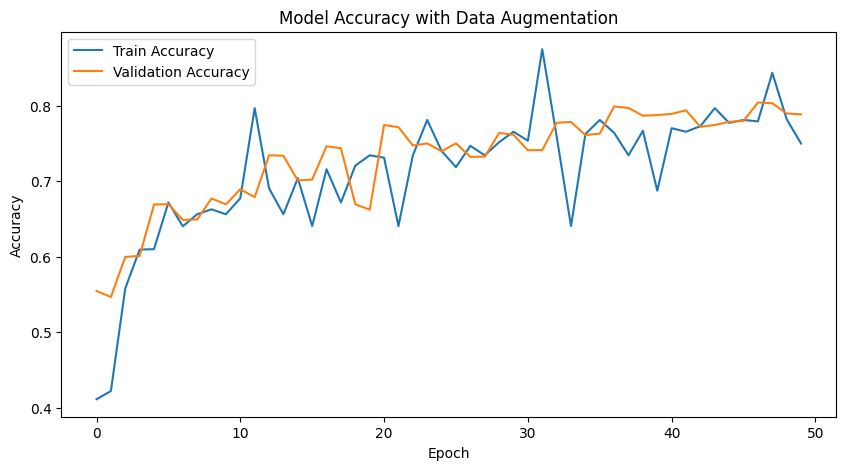

In [10]:
# Import Libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-10 Dataset
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

# Build CNN Model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
    layers.BatchNormalization(),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2,2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

# Compile Model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train with Data Augmentation
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=64),
    epochs=50,
    validation_data=(x_test, y_test),
    steps_per_epoch=x_train.shape[0] // 64
)

# Evaluate Model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

# Save Model
model.save('cifar10_cnn_model_augmented.h5')
print("Model saved as 'cifar10_cnn_model_augmented.h5'")

# Plot Training Results
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Model Accuracy with Data Augmentation')
plt.legend()
plt.show()


In [7]:
# Streamlit app
# streamlit run app.py